<a href="https://colab.research.google.com/github/ismail-memon-123/CS_5262_ML/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Networks

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Task 1: Linear Regression with One Variable

In [2]:
#Load data from txt file
food_data = np.array([
[6.1101,17.592],
[5.5277,9.1302],
[8.5186,13.662],
[7.0032,11.854],
[5.8598,6.8233],
[8.3829,11.886],
[7.4764,4.3483],
[8.5781,12],
[6.4862,6.5987],
[5.0546,3.8166],
[5.7107,3.2522],
[14.164,15.505],
[5.734,3.1551],
[8.4084,7.2258],
[5.6407,0.71618],
[5.3794,3.5129],
[6.3654,5.3048],
[5.1301,0.56077],
[6.4296,3.6518],
[7.0708,5.3893],
[6.1891,3.1386],
[20.27,21.767],
[5.4901,4.263],
[6.3261,5.1875],
[5.5649,3.0825],
[18.945,22.638],
[12.828,13.501],
[10.957,7.0467],
[13.176,14.692],
[22.203,24.147],
[5.2524,-1.22],
[6.5894,5.9966],
[9.2482,12.134],
[5.8918,1.8495],
[8.2111,6.5426],
[7.9334,4.5623],
[8.0959,4.1164],
[5.6063,3.3928],
[12.836,10.117],
[6.3534,5.4974],
[5.4069,0.55657],
[6.8825,3.9115],
[11.708,5.3854],
[5.7737,2.4406],
[7.8247,6.7318],
[7.0931,1.0463],
[5.0702,5.1337],
[5.8014,1.844],
[11.7,8.0043],
[5.5416,1.0179],
[7.5402,6.7504],
[5.3077,1.8396],
[7.4239,4.2885],
[7.6031,4.9981],
[6.3328,1.4233],
[6.3589,-1.4211],
[6.2742,2.4756],
[5.6397,4.6042],
[9.3102,3.9624],
[9.4536,5.4141],
[8.8254,5.1694],
[5.1793,-0.74279],
[21.279,17.929],
[14.908,12.054],
[18.959,17.054],
[7.2182,4.8852],
[8.2951,5.7442],
[10.236,7.7754],
[5.4994,1.0173],
[20.341,20.992],
[10.136,6.6799],
[7.3345,4.0259],
[6.0062,1.2784],
[7.2259,3.3411],
[5.0269,-2.6807],
[6.5479,0.29678],
[7.5386,3.8845],
[5.0365,5.7014],
[10.274,6.7526],
[5.1077,2.0576],
[5.7292,0.47953],
[5.1884,0.20421],
[6.3557,0.67861],
[9.7687,7.5435],
[6.5159,5.3436],
[8.5172,4.2415],
[9.1802,6.7981],
[6.002,0.92695],
[5.5204,0.152],
[5.0594,2.8214],
[5.7077,1.8451],
[7.6366,4.2959],
[5.8707,7.2029],
[5.3054,1.9869],
[8.2934,0.14454],
[13.394,9.0551],
[5.4369,0.61705],
])

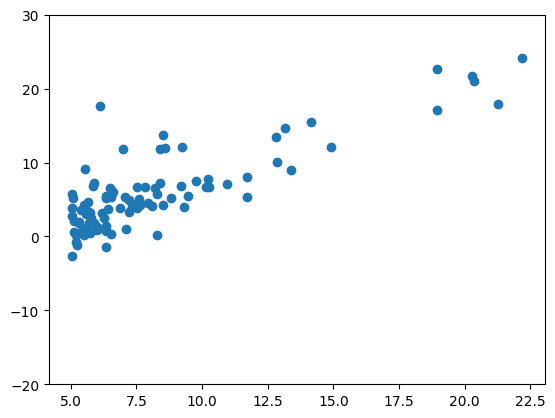

In [21]:
# Plot the data food_data
plt.scatter(food_data[:,0], food_data[:,1])
ax = plt.gca()
ax.set_ylim([-20, 30])
plt.show()

In [9]:
def calculate_single_forward(thetas, train_ex):
    '''
        thetas: theta0, theta1, ..., thetaj
        train_ex: (x, y)

        returns: gradients based on a single training example
    '''

    # parse model parameters
    theta_0 = thetas[0]
    theta_1 = thetas[1]

    # parse data inputs
    x0 = 1
    x1 = train_ex[0]
    y = train_ex[1]

    # do one forward pass with a single training example
    # to calculate error and gradient
    y_hat = theta_0 + theta_1 * x1
    error = y_hat - y

    # for each theta, we need the gradient for an update
    gradients = np.array([error * x0, error * x1])

    # Question: what would you do differently for GD or mini-batch GD?

    return gradients

In [22]:
def gradient_descent(training_data, thetas, alpha=5e-3):
    '''
    training_data: training dataset
    thetas: theta0, theta1, ..., thetaj
    alpha: learning rate, default to 0.0005

    returns:
            - thetas: the updated thetas
            - total_error: total error (note, not loss) from this iteration
    '''

    total_error = 0
    overall_gradients = np.zeros(2)

    # compute the summation of gradients across all training examples
    for ex in training_data:
        gradients = calculate_single_forward(thetas, ex)
        # gradients[0] is the error term (gradients[0] = error * x0 = error * 1)
        total_error += gradients[0]
        overall_gradients = overall_gradients + gradients

    # update thetas
    theta_0, theta_1 = thetas
    thetas[0] = theta_0 - alpha * overall_gradients[0]
    thetas[1] = theta_1 - alpha * overall_gradients[1]
    print(thetas[0])
    print(thetas[1])

    return thetas, total_error

In [27]:
def normalize_data(training_data):
    ''' Normalize the training data by scaling features to have zero mean and unit variance '''
    X = np.array([ex[0] for ex in training_data])  # extract x values
    mean_X = np.mean(X)
    std_X = np.std(X)
    normalized_X = (X - mean_X) / std_X
    return [(normalized_X[i], training_data[i][1]) for i in range(len(training_data))]

In [28]:
# set initial parameters
thetas = [0, 0.01]
old_thetas = thetas.copy()
alpha = 5e-3

# prepare training
total_epochs = 75
error_traj = [0] * total_epochs
#had to normalize data because otherwise it was bouncing too much (the thetas and would go from -infin to infin probably because of the negative values in the data)
training_data_normalized = normalize_data(food_data)

# perform training
for epoch in range(total_epochs):
    thetas, epoch_error = gradient_descent(training_data_normalized, thetas, alpha)
    print(thetas)
    # store a history of errors
    error_traj[epoch] = epoch_error


2.8319805000000002
2.2327749496809934
[np.float64(2.8319805000000002), np.float64(2.2327749496809934)]
4.2904504575
3.3775040487667054
[np.float64(4.2904504575), np.float64(3.3775040487667054)]
5.041562485612499
3.9670395347958465
[np.float64(5.041562485612499), np.float64(3.9670395347958465)]
5.428385180090436
4.270650310100854
[np.float64(5.428385180090436), np.float64(4.270650310100854)]
5.627598867746574
4.427009859382933
[np.float64(5.627598867746574), np.float64(4.427009859382933)]
5.730193916889485
4.507535027263203
[np.float64(5.730193916889485), np.float64(4.507535027263203)]
5.7830303671980845
4.5490054887215425
[np.float64(5.7830303671980845), np.float64(4.5490054887215425)]
5.810241139107013
4.570362776372588
[np.float64(5.810241139107013), np.float64(4.570362776372588)]
5.824254686640111
4.581361779512876
[np.float64(5.824254686640111), np.float64(4.581361779512876)]
5.831471663619657
4.587026266130124
[np.float64(5.831471663619657), np.float64(4.587026266130124)]
5.835188

(-10.0, 30.0)

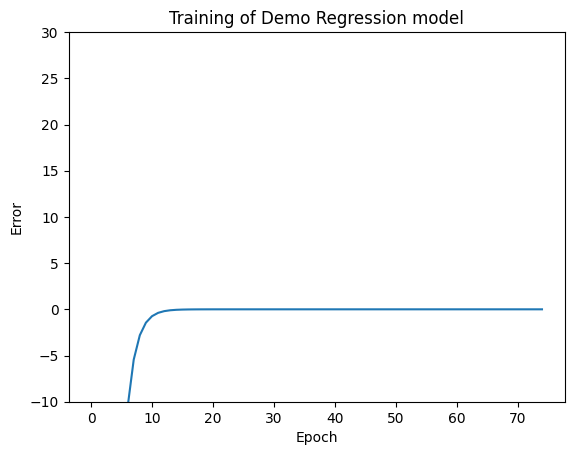

In [29]:
# Let's do an exploratory plot
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Demo Regression model');
ax = plt.gca()
ax.set_ylim([-10, 30])

-3.8957808783118546
1.1930336441895937


Text(0.5, 1.0, 'Comparison of pre- vs post-model training')

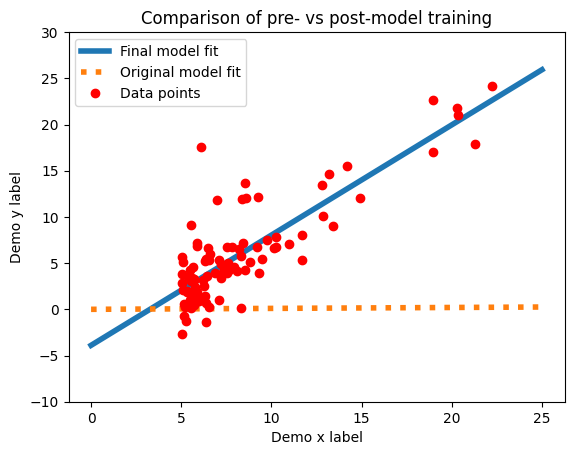

In [31]:


lin_pts = np.linspace(0, 25, 100) # gives you 100 values between [0, 25]

#Denormalize thetas
X = np.array([ex[0] for ex in food_data])  # extract x values
mean_X = np.mean(X)
std_X = np.std(X)
theta_1 = thetas[1] / std_X
theta_0 = thetas[0] - theta_1 * mean_X

mdl_pts = theta_0 + lin_pts * theta_1
print(theta_0)
print(theta_1)
plt.plot(lin_pts, mdl_pts, linewidth=4, label='Final model fit')
plt.legend()
ax = plt.gca()
ax.set_ylim([-10, 30])

# Let's look at the original least squares
orig_mdl_pts = old_thetas[0] + lin_pts * old_thetas[1]
plt.plot(lin_pts, orig_mdl_pts, ':', linewidth=4, label='Original model fit')
plt.legend()

# Let's plot the original points
plt.plot(food_data[:,0], food_data[:,1], 'ro', label='Data points') # 'ro' for red, circle
plt.legend()
plt.xlabel('Demo x label')
plt.ylabel('Demo y label')
plt.title('Comparison of pre- vs post-model training')


Model Definition and Summary: This model used a one variable linear regression, where the x1 variable (the input feature) was the population of the city and we were trying to predict the profit of the truck. The need is to compute theta 0 and theta 1 the intercept and slope of the linear line we are fitting through the data.

#Multi Variable Regression

In [32]:
# Load data from text file
housing_data = np.array([
    [2104,3,399900],
[1600,3,329900],
[2400,3,369000],
[1416,2,232000],
[3000,4,539900],
[1985,4,299900],
[1534,3,314900],
[1427,3,198999],
[1380,3,212000],
[1494,3,242500],
[1940,4,239999],
[2000,3,347000],
[1890,3,329999],
[4478,5,699900],
[1268,3,259900],
[2300,4,449900],
[1320,2,299900],
[1236,3,199900],
[2609,4,499998],
[3031,4,599000],
[1767,3,252900],
[1888,2,255000],
[1604,3,242900],
[1962,4,259900],
[3890,3,573900],
[1100,3,249900],
[1458,3,464500],
[2526,3,469000],
[2200,3,475000],
[2637,3,299900],
[1839,2,349900],
[1000,1,169900],
[2040,4,314900],
[3137,3,579900],
[1811,4,285900],
[1437,3,249900],
[1239,3,229900],
[2132,4,345000],
[4215,4,549000],
[2162,4,287000],
[1664,2,368500],
[2238,3,329900],
[2567,4,314000],
[1200,3,299000],
[852,2,179900],
[1852,4,299900],
[1203,3,239500]
])

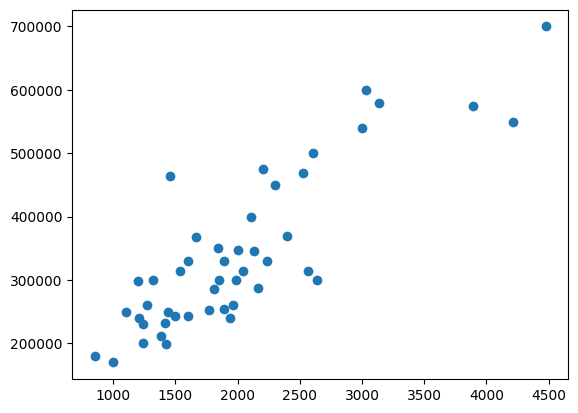

In [34]:
# Plot the data food_data
plt.scatter(housing_data[:,0], housing_data[:,2])
plt.show()

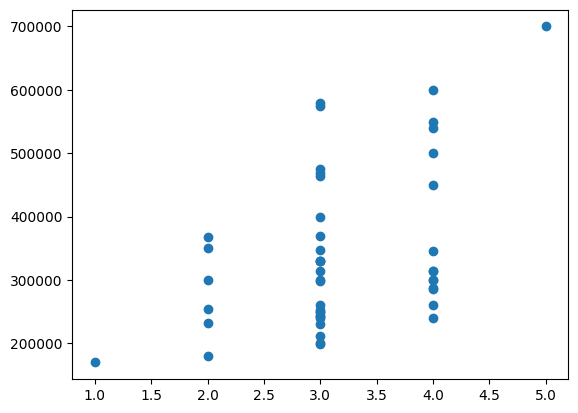

In [35]:
# Plot the data food_data
plt.scatter(housing_data[:,1], housing_data[:,2])
plt.show()

In [36]:
def calculate_single_forward_2(thetas, train_ex):
    '''
        thetas: theta0, theta1, ..., thetaj
        train_ex: (x, y)

        returns: gradients based on a single training example
    '''

    # parse model parameters
    theta_0 = thetas[0]
    theta_1 = thetas[1]
    theta_2 = thetas[2]

    # parse data inputs
    x0 = 1
    x1 = train_ex[0]
    x2 = train_ex[1]
    y = train_ex[2]

    # do one forward pass with a single training example
    # to calculate error and gradient
    y_hat = theta_0 + theta_1 * x1 + theta_2 * x2
    error = y_hat - y

    # for each theta, we need the gradient for an update
    gradients = np.array([error * x0, error * x1, error * x2])

    # Question: what would you do differently for GD or mini-batch GD?

    return gradients

In [43]:
def gradient_descent_2(training_data, thetas, alpha=5e-3):
    '''
    training_data: training dataset
    thetas: theta0, theta1, ..., thetaj
    alpha: learning rate, default to 0.0005

    returns:
            - thetas: the updated thetas
            - total_error: total error (note, not loss) from this iteration
    '''

    total_error = 0
    overall_gradients = np.zeros(3)

    # compute the summation of gradients across all training examples
    for ex in training_data:
        gradients = calculate_single_forward_2(thetas, ex)
        # gradients[0] is the error term (gradients[0] = error * x0 = error * 1)
        total_error += gradients[0]
        overall_gradients = overall_gradients + gradients

    # update thetas
    theta_0, theta_1, theta_2 = thetas
    thetas[0] = theta_0 - alpha * overall_gradients[0]
    thetas[1] = theta_1 - alpha * overall_gradients[1]
    thetas[2] = theta_2 - alpha * overall_gradients[2]
    print(thetas[0])
    print(thetas[1])
    print(thetas[2])

    return thetas, total_error

In [44]:
def normalize_data_2(training_data):
    ''' Normalize the training data by scaling features to have zero mean and unit variance '''
    X = np.array([ex[0] for ex in training_data])  # extract x values
    mean_X = np.mean(X)
    std_X = np.std(X)
    normalized_X = (X - mean_X) / std_X
    X_2 = np.array([ex[1] for ex in training_data])  # extract x values
    mean_X_2 = np.mean(X_2)
    std_X_2 = np.std(X_2)
    normalized_X_2 = (X_2 - mean_X_2) / std_X_2
    return [(normalized_X[i], normalized_X_2[i], training_data[i][1]) for i in range(len(training_data))]

In [45]:
# set initial parameters
thetas = [0, 0.01, 0.1]
old_thetas = thetas.copy()
alpha = 5e-3

# prepare training
total_epochs = 75
error_traj = [0] * total_epochs
#had to normalize data because otherwise it was bouncing too much (the thetas and would go from -infin to infin probably because of the negative values in the data)
training_data_normalized_2 = normalize_data_2(housing_data)

# perform training
for epoch in range(total_epochs):
    thetas, epoch_error = gradient_descent_2(training_data_normalized_2, thetas, alpha)
    print(thetas)
    # store a history of errors
    error_traj[epoch] = epoch_error


0.7449999999999999
0.09355908222565779
0.25210213719934776
[np.float64(0.7449999999999999), np.float64(0.09355908222565779), np.float64(0.25210213719934776)]
1.3149250000000001
0.13746631112107732
0.3574645409241807
[np.float64(1.3149250000000001), np.float64(0.13746631112107732), np.float64(0.3574645409241807)]
1.750917625
0.15719046092189015
0.4322889268432033
[np.float64(1.750917625), np.float64(0.15719046092189015), np.float64(0.4322889268432033)]
2.084451983125
0.16243312300266172
0.4869340359711091
[np.float64(2.084451983125), np.float64(0.16243312300266172), np.float64(0.4869340359711091)]
2.339605767090625
0.15925288428201725
0.5280476505292226
[np.float64(2.339605767090625), np.float64(0.15925288428201725), np.float64(0.5280476505292226)]
2.534798411824328
0.15140976684670762
0.5599180605717781
[np.float64(2.534798411824328), np.float64(0.15140976684670762), np.float64(0.5599180605717781)]
2.684120785045611
0.14121588167172838
0.5853310180620656
[np.float64(2.684120785045611),

(-10.0, 30.0)

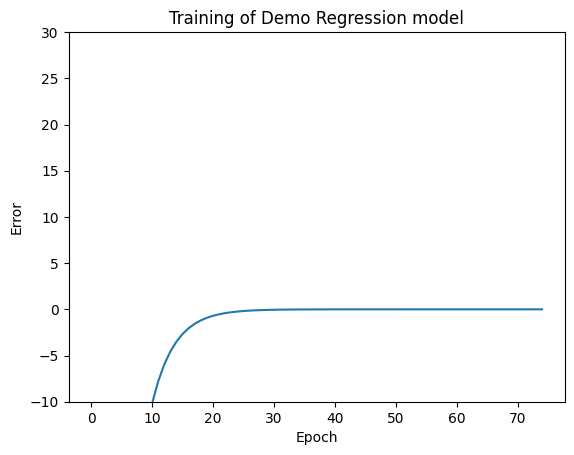

In [46]:
# Let's do an exploratory plot
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Demo Regression model');
ax = plt.gca()
ax.set_ylim([-10, 30])

This multi variable regression had the square footage and the number of bedrooms as inputs and the output is the price. The weights of the thetas 0 and thetas 1 and 2 (the intercept, coeff of the square footage, and the coefficient of the number of bedrooms needed to be computed).